## T51 Capstone project VII

### Loading dataset

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("UsArrests.csv")
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Exploroatory Data Analysis (EDA) and preprocessing the dataset

In [30]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   City      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
(50, 5)


In [31]:
# get the percetage of null values in each column
df.isnull().sum() * 100 / df.shape [0]

City        0.0
Murder      0.0
Assault     0.0
UrbanPop    0.0
Rape        0.0
dtype: float64

In [32]:
# to upderstand the diversity of values in that feature
#call the numbers of features/types out
#to understand the distrition of the values in each feature
#..size file
unic_en = df.nunique()
print(unic_en)

# find entries = 1 unique entry
feat = unic_en[unic_en == 1].index
feat = feat.tolist()

print("\nFeature that has 1 unique entry:", feat)

City        50
Murder      43
Assault     45
UrbanPop    36
Rape        48
dtype: int64

Feature that has 1 unique entry: []


In [10]:
# Getting a basic statistic out
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


#### The UsArrests dataset has 50 rows and 5 columns, including City is a object datatype, Murder and Rape are float, Assault and UrbanPop are numerical data. 
#### The dataset has no missing values and none has unique entry equal 1.

In [12]:
# to visualise representation of the distribution 
#and spread of each variable in the dataset, we need to import libaries
import matplotlib.pyplot as plt
import seaborn as sns

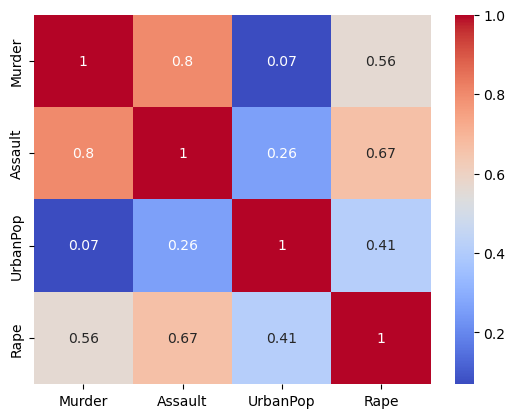

In [13]:
#Checking the correclation between variables in the dataset before narrow down to specific graph
# Compute the correlation matrix
corr = df.corr()

# Plot the correlation heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### The correlation between the Assault and Murder variales in the UsArrests dataset is 0.8. This indicates that  there is a strong positive correlation between these two variables. The values of the Assault variable increase, means the values of the Murder variable are also likely to go up.

### While the correlation between the Assault and Rape variables in the same dataset is 0.67. This indicates that there is a moderate positive correlation between these two variables. It means that as the Assault values increase, the values of the Rap values are also increase.

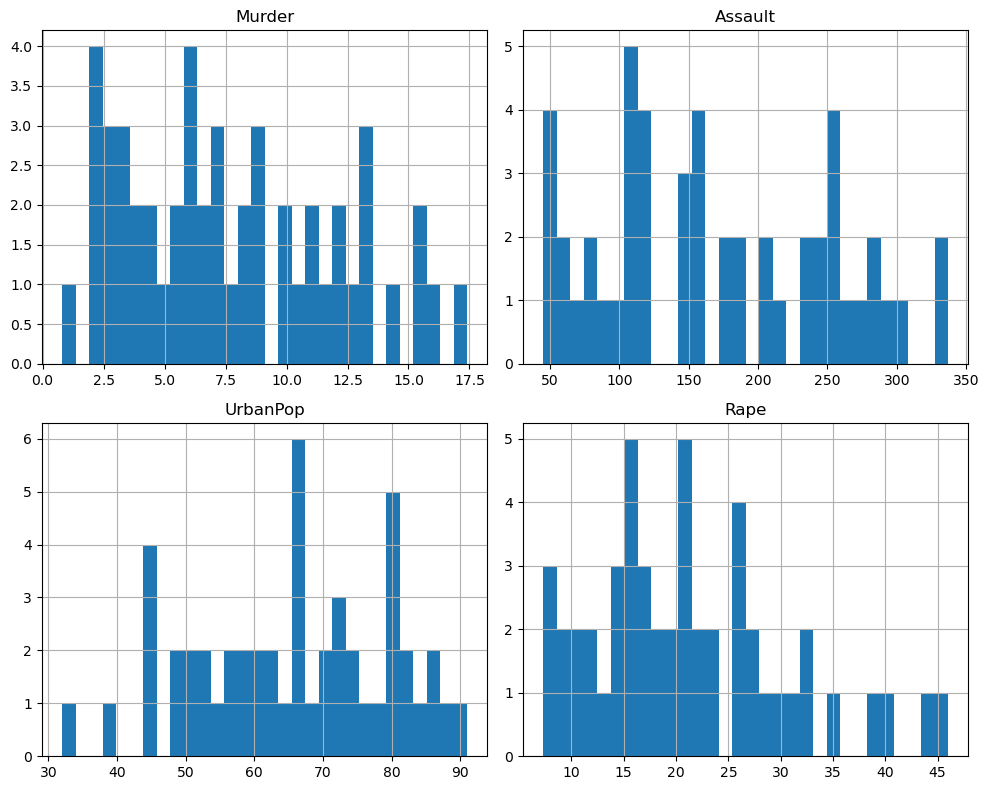

In [15]:
# Plot histograms of each variable
df.hist(bins=30, figsize=(10,8))
plt.tight_layout()
plt.show()



The distribution on each variable is not normally distributed because it has multiple spikes. Therefore, the data has a complex distrition and or the data is spread out. We may need to transform the data to make it more normally distributed.

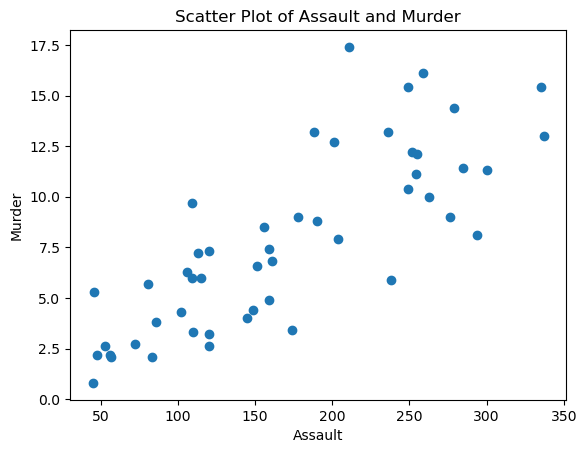

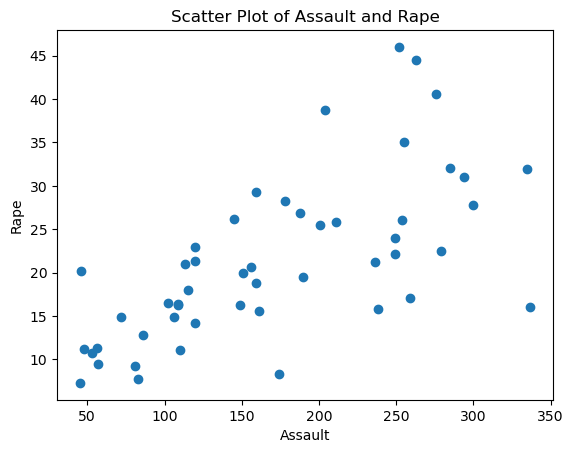

In [18]:
# Plot scatter plot of the relationship between Assault and Murder
plt.scatter(x=df['Assault'], y=df['Murder'])
plt.xlabel('Assault')
plt.ylabel('Murder')
plt.title('Scatter Plot of Assault and Murder')
plt.show()

# Plot scatter plot of the relationship between Assault and Rape
plt.scatter(x=df['Assault'], y=df['Rape'])
plt.xlabel('Assault')
plt.ylabel('Rape')
plt.title('Scatter Plot of Assault and Rape')
plt.show()


#### The scatterplot shows the postive relations between the two variables and clearly the Assault and Murder indicated the strong link than the Assault and Rape

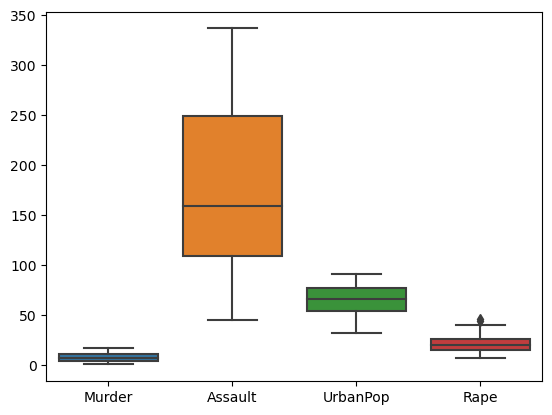

In [25]:
# Plot box plot to check to visualise the relationship between variables and to check for outliers
sns.boxplot(data=df)
plt.show()

### Principal Composent Analysis (PCA), preprocessing

In [33]:
#double check before performing PCA
print(df.isnull().sum())

City        0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64


In [58]:
from sklearn.decomposition import PCA

df = pd.read_csv("UsArrests.csv")
#the model is initialised with n_components=2
#it will keep 2 new variables that capture the most information from the original variables
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df.drop(["City"], axis=1))
#the df_pca will stored with the transformed data
df_pca = pd.DataFrame(df_pca, columns=["PC1","PC2"])
df_pca["City"] = df["City"]

print(df_pca)

           PC1        PC2            City
0    64.802164  11.448007         Alabama
1    92.827450  17.982943          Alaska
2   124.068216  -8.830403         Arizona
3    18.340035  16.703911        Arkansas
4   107.422953 -22.520070      California
5    34.975986 -13.719584        Colorado
6   -60.887282 -12.932530     Connecticut
7    66.731025  -1.353798        Delaware
8   165.244370  -6.274690         Florida
9    40.535177   7.290240         Georgia
10 -123.536106 -24.291208          Hawaii
11  -51.797002   9.469191           Idaho
12   78.992097 -12.897060        Illinois
13  -57.550961  -2.846265         Indiana
14 -115.586790   3.342131            Iowa
15  -55.789694  -3.157234          Kansas
16  -62.383181  10.673271        Kentucky
17   78.277631   4.294917       Louisiana
18  -89.261044  11.487827           Maine
19  129.330136   5.007031        Maryland
20  -21.266283 -19.450179   Massachusetts
21   85.451527  -5.904557        Michigan
22  -98.954816  -5.209601       Mi

In [63]:
#double check for missing values
print(df_pca.isnull().sum())

PC1     0
PC2     0
City    0
dtype: int64


### Report from PCA finding:


In [66]:
#to calculates the Pearson correlation matrix for the transformed data
print(df_pca.corr())

              PC1           PC2
PC1  1.000000e+00  1.641348e-16
PC2  1.641348e-16  1.000000e+00


#### The correlation matrix shows the linear relationship between the two new variables, which is PC1 and PC2. PC1+PC1 has correlation between itself of 1.000000e+00 score and it means a positive linear relationship. While PC1 and PC2 are with correlation of  1.641348e-16, which shows weak linear relationship between the two variables. 

#### The finding shows the PC1 captures a significant number of information fromt he original variables, while PC2 captures very less information from the original variables.

#### Moreover, it can explain the PC1 represents a single linear combination of the variables and the PC2 as a residual component , captures information that not captured by PC1. To retain most of the information from the original data, only PC1 needs to be retained.


In [67]:
#calculates the standard deviation of each principal component in df_pca
#to see how much their values are spread out from their mean values
std = df_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [83.73240025 14.21240185]


In [68]:
#the explained variance ratio of each component
#it gives the contribution of each component to the total variability of the data
#where the sum of the explained variances is equal to 1
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [0.96553422 0.02781734]


In [69]:
#the cumulative proportion of the variance explained by each component
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [7011.11485102 7213.10721735]


It shows the first two components together explain over 98% of the variablility in the data.

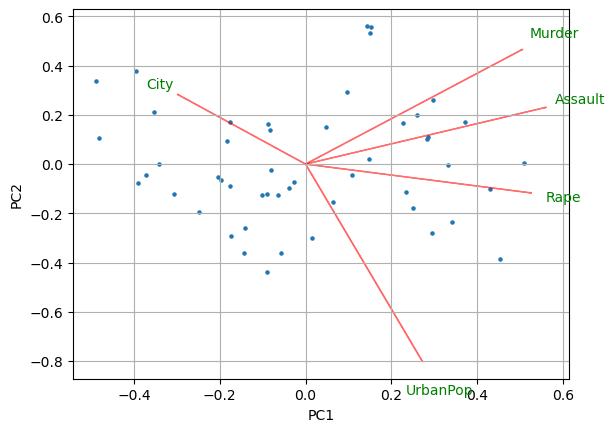

In [86]:
# Standardize the features
X = (df - df.mean()) / df.std()

# Apply PCA to the standardized features
pca = PCA(n_components=2)
df_pca = pca.fit_transform(X)

# Plot the biplot
def biplot(score, coeff, labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    fig, ax = plt.subplots()
    ax.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            ax.text(coeff[i,0]*1.15, coeff[i,1]*1.15, "Var"+str(i+1), color='g', ha='center', va='center')
        else:
            ax.text(coeff[i,0]*1.15, coeff[i,1]*1.15, labels[i], color='g', ha='center', va='center')
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()

biplot(df_pca, np.transpose(pca.components_), list(df.columns))
plt.show()

#### Each point represents one state/city in the UsArrests dataset, and the arrows represent the weight of each feature in the formation of the two principal components. The finding shows that there is a moderate amount of correlation betweenth e features but not a strong relationship. However, it is still contributing to the variation in the dat along both dimensions.

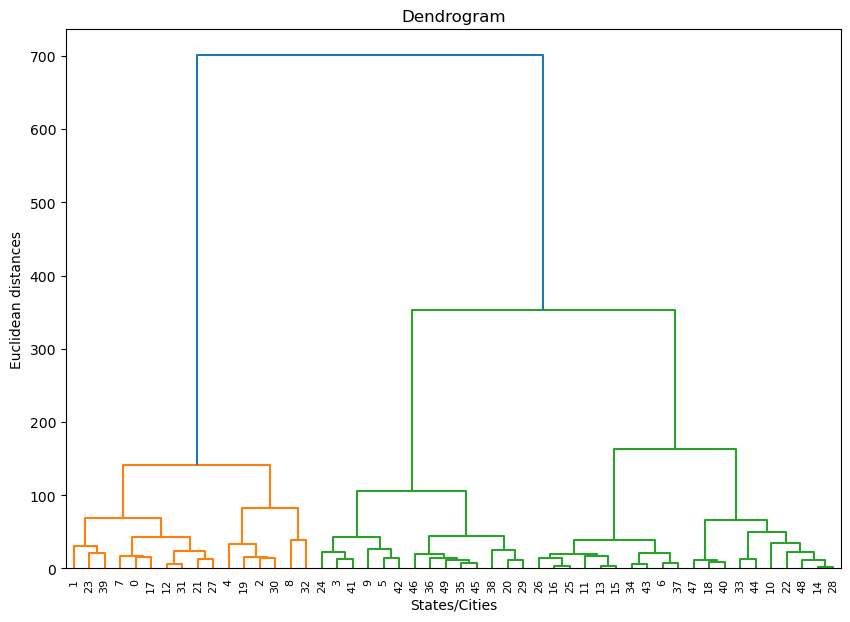

In [91]:
#to calculate the linkage matrix that stores the information about the distances between the data points
import scipy.cluster.hierarchy as shc

# Preprocess the data
#select only numerical columns for clustering
X = df.iloc[:,1:].values

# Perform Hierarchical Clustering
plt.figure(figsize=(10, 7))  
#to plot the dendrogram that represents the hierarchical relationship between the dta points
dend = shc.dendrogram(shc.linkage(X, method='ward'))
#ward method to minimizes the variance of the distance betweenthe clusters being merged
plt.title("Dendrogram")
plt.xlabel("States/Cities")
plt.ylabel("Euclidean distances")
plt.show()

#### The first set of long vertical lines, near the y-axis represent a high level of dissimilarity betweent he initial clusters. The second set of long vertical lines, further from the y-axis, represent a lower level of dissimilarity as the distance betweent he lines is shorter.

#### The finding indicates that the data points within these latter clusters are more similar to each other. the branching of the dendrogram and the shorter vertical lines within these branches further refine the structure of the clusters, dividing the data points into smaller ones and more  homogeneous groups.

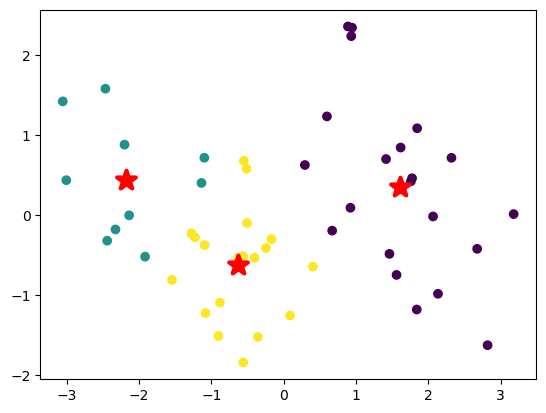

In [92]:
#import the KMeans class 
from sklearn.cluster import KMeans

# initialise an instance of the KMeans class
#set to 3, Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the k-means algorithm on scaled data
kmeans.fit(df_pca)
# Predicting the clusters
pred_clusters = kmeans.predict(df_pca)

# Plotting the cluster assignments and cluster centers
plt.scatter(df_pca[:,0], df_pca[:,1], c=pred_clusters)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', s=200, linewidths=3, color='r')
plt.show()

#### The finding shows that the data has been separated ito 3 clusters based on their patterns of similarity. The K-Means algorithm grouped the dat points into 3 groups that represent with 3 stars. Each star represent the centerr of a cluster. The clusters are differentiated based on their location in the PCA transformed space.